# Requisições web GodsUnchained

## 1. API: Pegando informações sobre as cartas

In [18]:
import requests
import json
import pandas as pd
import numpy as np

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',None)

In [20]:
def basic_cards_information():
    
    base_url = 'https://api.godsunchained.com'
    version = 'v0'
    proto = 'proto?page=0'
    url = "/".join(i for i in [base_url, version, proto])
    
    try:
        req = requests.get(url)
    except Exception as erro:
        print('DEU ERRO:\t', erro)
    
    cards = json.loads(req.text)['records']
    informacoes = ['id','name','effect','god','rarity',
                   ('tribe','String'), 'mana',('attack','Int64'),
                   ('health','Int64'), 'type', 'set']
    
    resposta = []
    for card in cards:
        atributos = []
        for inf in informacoes:
            if not isinstance(inf,str):
                atributos.append(card[inf[0]][inf[1]])
                continue
            atributos.append(card[inf])
        resposta.append(atributos)
        
            
    df = pd.DataFrame(data=resposta, columns=['id','name','effect','god',
                                                'rarity','tribe', 'mana',
                                                'attack','health', 'type', 'set'])
    return df

In [21]:
df = basic_cards_information()
df

,id,name,effect,god,rarity,tribe,mana,attack,health,type,set
0,12,Sanctify,Give ward to all creatures with strength 2 or less.<br>Draw a card.,light,common,,2,0,0,spell,genesis
1,13,Charm,"Gain control of target enemy creature for one turn. Give it godblitz. Look at your opponent's hand, select any card and pull it into your hand.",deception,rare,,8,0,0,spell,genesis
2,14,Healing Insight,Give a friendly creature +2 health and fully heal it.,light,common,,1,0,0,spell,genesis
3,1127,Cardshark,Roar: Summon a 1/1 Bodyguard with frontline.,neutral,rare,guild,1,1,1,creature,core
4,15,Respected Jarl,Blitz.<br>Roar: Give a friendly damaged creature twin strike and +1 strength.,war,epic,viking,2,2,1,creature,genesis
5,16,Faustian Pact,"Draw nine cards.<br>At the end of your turn, obliterate your hand.",death,epic,,3,0,0,spell,genesis
6,18,Levitate,Remove frontline and backline from target creature.<br>Draw a card.,magic,common,,1,0,0,spell,genesis
7,19,Mountain Greatwyrm,"Whenever this creature takes damage, double its strength.",war,rare,dragon,7,4,9,creature,genesis
8,20,Dimension Looper,"Roar: Deal 1 damage. If you're holding an Aether, deal 3 damage instead.",magic,common,mystic,4,3,4,creature,genesis
9,21,"Osiris, the Eternal",Afterlife: Shuffle this creature into your deck. It keeps all buffs.,light,legendary,anubian,3,3,4,creature,genesis


In [22]:
df.shape

(1495, 11)

## 2. API: Pegando informações sobre valores das cartas

In [23]:
def get_card_price(proto_id, quality, buy_token_type):

    gods_address= "0xacb3c6a43d15b907e8433077b6d38ae40936fe2c"
    base_url = "https://api.x.immutable.com/v1/orders?"
    metadata_str = "%7B%22proto%22%3A%5B%22{}%22%5D%2C%22quality%22%3A%5B%22{}%22%5D%7D".format(proto_id,quality)
    filters = [
        ("direction","asc"),
        ("include_fees","true"),
        ("order_by","buy_quantity"),
        ("page_size","200"),
        ("sell_metadata",metadata_str.replace('\\',"")),
        ("sell_token_type","ERC721"),
        ("status","active"),
        ("sell_token_address", gods_address),
    ]
    if buy_token_type == "GODS":
        filters.append(("buy_token_address","0xccc8cb5229b0ac8069c51fd58367fd1e622afd97"))
    else:
        filters.append(("buy_token_type", "ETH"))
    

In [24]:
def economic_information(df, cotacao_ETH, cotacao_GODS):
    
    protos = [str(i) for i in df['id']]
    cards = []
    for proto in protos:
        try:
            lista = cards.append(float(get_card_price(proto, 'Meteorite', 'ETH')['price'])*cotacao_ETH)     
        except:
            cards.append(np.nan)
    
    cards_2 = []
    for proto in protos:
        try:
            lista = cards_2.append(float(get_card_price(proto, 'Meteorite', 'GODS')['price'])*cotacao_GODS)     
        except:
            cards_2.append(np.nan)
    
    df_economic = pd.DataFrame({'price_ETH_$':cards, 'price_GODS_$':cards_2})

    return pd.concat([df, df_economic], axis=1)
    

In [25]:
df_values = economic_information(df,3286.97, 1.42)

lista = []
for e, g in zip(df_values['price_ETH_$'], df_values['price_GODS_$']):
    lista.append(abs(e-g)/min(e,g))

df_values['difference_%'] = lista
df_values.head()

,id,name,effect,god,rarity,tribe,mana,attack,health,type,set,price_ETH_$,price_GODS_$,difference_%
0,12,Sanctify,Give ward to all creatures with strength 2 or less.<br>Draw a card.,light,common,,2,0,0,spell,genesis,NaN,NaN,NaN
1,13,Charm,"Gain control of target enemy creature for one turn. Give it godblitz. Look at your opponent's hand, select any card and pull it into your hand.",deception,rare,,8,0,0,spell,genesis,NaN,NaN,NaN
2,14,Healing Insight,Give a friendly creature +2 health and fully heal it.,light,common,,1,0,0,spell,genesis,NaN,NaN,NaN
3,1127,Cardshark,Roar: Summon a 1/1 Bodyguard with frontline.,neutral,rare,guild,1,1,1,creature,core,NaN,NaN,NaN
4,15,Respected Jarl,Blitz.<br>Roar: Give a friendly damaged creature twin strike and +1 strength.,war,epic,viking,2,2,1,creature,genesis,NaN,NaN,NaN


In [9]:
# O codigo acima leva muito tempo pra rodar, vamos salvar o output

#df_values.to_csv('godsunchained_complet.csv')

# Importando, pra não ter que rodar o codigo acima

df_values = pd.read_csv('godsunchained_complet.csv')
df_values.tribe.fillna('None', inplace=True)
df_values.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df_values.shape

(1495, 14)

## 3. Web Scrapping: Pegando mais informações sobre as cartas

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from time import sleep

options = Options()
options.add_argument('window-size=800,800')

navegador = webdriver.Chrome()
navegador.get('https://gudecks.com/meta/card-rankings')

sleep(10)

but = navegador.find_element(By.XPATH, '//*[@id="root"]/div[3]/button')
but.click()

sleep(0.5)

# Alterando o numero de matchs necessario para selecionar as cartas 
#but_2 = navegador.find_element(By.XPATH, '//*[@id="root"]/div[1]/div/div[2]/div[1]/div[1]/div[7]/div[2]/div/div/div')
#but_2.click()
#navegador.find_element(By.XPATH, '//*[@id="rrs-decksWithCard-menu"]/li[3]').click() # li[1] ou li[2]...

informations = [] # Todas as paginas
for i in range(53):
    informations.append(BeautifulSoup(navegador.page_source, 'html.parser'))
    but = navegador.find_element(By.XPATH, '//*[@id="root"]/div[1]/div/div[2]/div[1]/div[2]/div[2]/div/div[3]/button')
    but.click()
    sleep(0.025)

all_cards = [] 
for site in informations:
    cards = site.findAll('div', attrs={'class':'rt-tr-group'})
    for card in cards:
        little_list = []
        try:
            little_list.append(card.find('div', attrs={'class':'card-ranking-name'}).text) # Nome da carta
        except:
            continue
        little_list.extend([atr.text for atr in card.findAll('div', attrs={'class':'rt-td react-table-cell'})]) #Info das cartas

        all_cards.append(little_list)
    
    

colunas = ['Name', 'God', 'Set', 'Matches', 'In % of Decks', 'Copies', 'Deck win rate', 'Unique Deck WR','Est. Price']
df_web_scrap = pd.DataFrame(all_cards, columns=colunas)
df_web_scrap.head()

,Name,God,Set,Matches,In % of Decks,Copies,Deck win rate,Unique Deck WR,Est. Price
0,O Fortuna,Magic,Genesis,149,1.0%,1.18,67.1%,67.1%,0.0010
1,Arcane Transcendent,Magic,Genesis,575,3.8%,1.91,66.1%,66.4%,0.0010
2,Equivalent Exchange,Magic,Genesis,135,0.9%,1.01,63.7%,63.7%,0.0087
3,Ancient Texts,Magic,Genesis,2.040,13.3%,1.92,60.8%,61.3%,0.0098
4,Form of Power,Magic,Trial,1.751,11.5%,1.95,60.5%,60.9%,0.0039


In [14]:
df_web_scrap.shape

(904, 9)

## 4. Juntando tudo:

In [15]:
df_more = df_web_scrap.drop(labels=['God','Set','Est. Price', 'Matches', 'Copies'], axis=1)
df_more.head()

,Name,In % of Decks,Deck win rate,Unique Deck WR
0,O Fortuna,1.0%,67.1%,67.1%
1,Arcane Transcendent,3.8%,66.1%,66.4%
2,Equivalent Exchange,0.9%,63.7%,63.7%
3,Ancient Texts,13.3%,60.8%,61.3%
4,Form of Power,11.5%,60.5%,60.9%


#### 4.1 Small cleaning

In [16]:
for column in df_more:
    df_more[column] = df_more[column].apply(lambda x: ''.join([i for i in x if i != '%']))

for i in ['In % of Decks', 'Deck win rate', 'Unique Deck WR']:
    df_more[i] = df_more[i].apply(lambda x: float(x)/100)

    
df_more.rename({'Name': 'name'}, axis=1, inplace=True)
df_more.head()

,name,In % of Decks,Deck win rate,Unique Deck WR
0,O Fortuna,0.010,0.671,0.671
1,Arcane Transcendent,0.038,0.661,0.664
2,Equivalent Exchange,0.009,0.637,0.637
3,Ancient Texts,0.133,0.608,0.613
4,Form of Power,0.115,0.605,0.609


In [17]:
df_more.isnull().sum()

name              0
In % of Decks     0
Deck win rate     0
Unique Deck WR    0
dtype: int64

#### 4.2 Juntando tudo de novo

In [292]:
df_basic = df_values.dropna(axis=0)
df_basic.shape

(1062, 14)

In [298]:
df_all = pd.merge(df_basic, df_more.dropna(axis=0), on='name')
df_all.isnull().sum()

id                0
name              0
effect            0
god               0
rarity            0
tribe             0
mana              0
attack            0
health            0
type              0
set               0
price_ETH_$       0
price_GODS_$      0
difference_%      0
In % of Decks     0
Deck win rate     0
Unique Deck WR    0
dtype: int64

In [294]:
df_all.to_csv('data_set.csv')

In [295]:
df_all.shape

(784, 17)

## 5. Basic EDA and pre-processing

In [300]:
# A diferença no shape se da pois no df_more não há todas as cartas que há no df_basic

print(df_basic.shape)
print(df_more.shape)
print(df_all.shape)

(1062, 14)
(1039, 4)
(784, 17)


In [299]:
#df_all.info()

In [179]:
df_all.describe()

,id,mana,attack,health,price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,942.739409,3.530167,1.893453,2.355584,10.457142,11.940310,0.203516,0.118164,0.503254,0.503905
std,478.294063,2.015378,2.150553,2.420059,33.964594,41.537574,0.255192,0.183473,0.047530,0.048515
min,1.000000,0.000000,0.000000,0.000000,0.012706,0.022760,0.000294,0.001000,0.332000,0.325000
25%,607.500000,2.000000,0.000000,0.000000,0.169686,0.178012,0.049444,0.010000,0.481500,0.481000
50%,1075.000000,3.000000,1.000000,2.000000,0.663876,0.846000,0.116259,0.041000,0.511000,0.511000
75%,1304.500000,5.000000,3.000000,4.000000,3.144675,3.438995,0.268194,0.134000,0.533000,0.534500
max,1778.000000,10.000000,13.000000,17.000000,347.861463,494.162700,3.445646,1.249000,0.634000,0.634000


### 5.1 Calculando outliers

##### Os outliers do ETH são todos valores acima da haste_sup dolares

In [301]:
prices = df_all['price_ETH_$']

Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)


IQR = Q3 - Q1

haste_inf = Q1-1.5*IQR
haste_sup = Q3+1.5*IQR

print(haste_inf, haste_sup)
print(Q1, Q3, IQR)

-4.0979271296875 7.2725238428125
0.1659919849999999 3.008604728125 2.842612743125


In [302]:
df_all.shape

(784, 17)

In [310]:
prices_ETH = df_all[df_all['price_ETH_$']<haste_sup]

(650, 17)

##### Os outliers do GODS são todos valores acima da haste_sup dolares

In [304]:
prices_2 = df_all['price_GODS_$']

Q1 = prices_2.quantile(0.25)
Q3 = prices_2.quantile(0.75)


IQR = Q3 - Q1

haste_inf = Q1-1.5*IQR
haste_sup = Q3+1.5*IQR

print(haste_inf, haste_sup)
print(Q1, Q3, IQR)

-4.5752848186435 8.0843708910725
0.17208607250000002 3.3369999999289996 3.1649139274289997


In [305]:
df_all.shape

(784, 17)

In [311]:
prices_GODS = df_all[df_all['price_GODS_$']<haste_sup]

### 5.2 Plotando boxplots

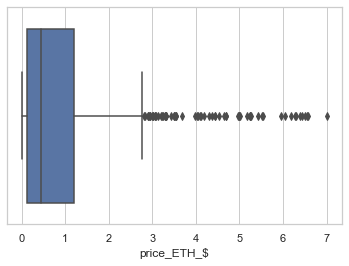

In [312]:
import seaborn as sns

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=prices_ETH['price_ETH_$'])

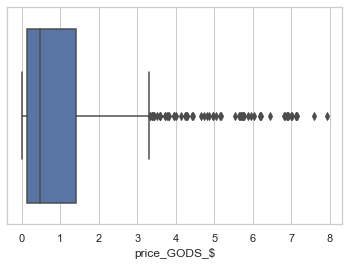

In [313]:
import seaborn as sns

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=prices_GODS['price_GODS_$'])

### 5.1 Index

In [314]:
df_all.set_index('id', drop=True, inplace=True)
df_all.head()

,name,effect,god,rarity,tribe,mana,attack,health,type,set,price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
id,,,,,,,,,,,,,,,,
107,Erratic Summons,Summon a copy of a random creature from your opponent's void.,magic,rare,None,2,0,0,spell,genesis,1.958705,1.775158,0.103398,0.003,0.550,0.550
220,Field Nurse,"At the end of each turn, heal 2 to a random friendly injured creature.",light,common,None,1,1,2,creature,genesis,1.792713,2.552127,0.423612,0.063,0.581,0.582
221,Sit Down,"Set a creature's strength to 0.<br>At the start of your next turn, set it to its base value.",light,common,None,1,0,0,spell,genesis,0.846559,0.823600,0.027877,0.008,0.527,0.527
222,Bast's Claws,"Godblitz.<br>Whenever you attack, give +1/+1 to a random creature in your hand.",war,rare,None,6,3,4,weapon,genesis,1.925507,1.831800,0.051156,0.003,0.535,0.535
1,Nethergram,Summon three random creatures that cost 3 mana or less from your void. Give them +1/+1.,death,rare,None,7,0,0,spell,genesis,1.261539,1.278083,0.013114,0.003,0.573,0.573


### 5.2 Categorical columns

In [315]:
df_all.shape

(784, 16)

In [316]:
df_categorical = df_all[df_all.dtypes[df_all.dtypes == 'object'].index]
df_categorical.head()

,name,effect,god,rarity,tribe,type,set
id,,,,,,,
107,Erratic Summons,Summon a copy of a random creature from your opponent's void.,magic,rare,None,spell,genesis
220,Field Nurse,"At the end of each turn, heal 2 to a random friendly injured creature.",light,common,None,creature,genesis
221,Sit Down,"Set a creature's strength to 0.<br>At the start of your next turn, set it to its base value.",light,common,None,spell,genesis
222,Bast's Claws,"Godblitz.<br>Whenever you attack, give +1/+1 to a random creature in your hand.",war,rare,None,weapon,genesis
1,Nethergram,Summon three random creatures that cost 3 mana or less from your void. Give them +1/+1.,death,rare,None,spell,genesis


#### 5.2.1 Categorical EDA

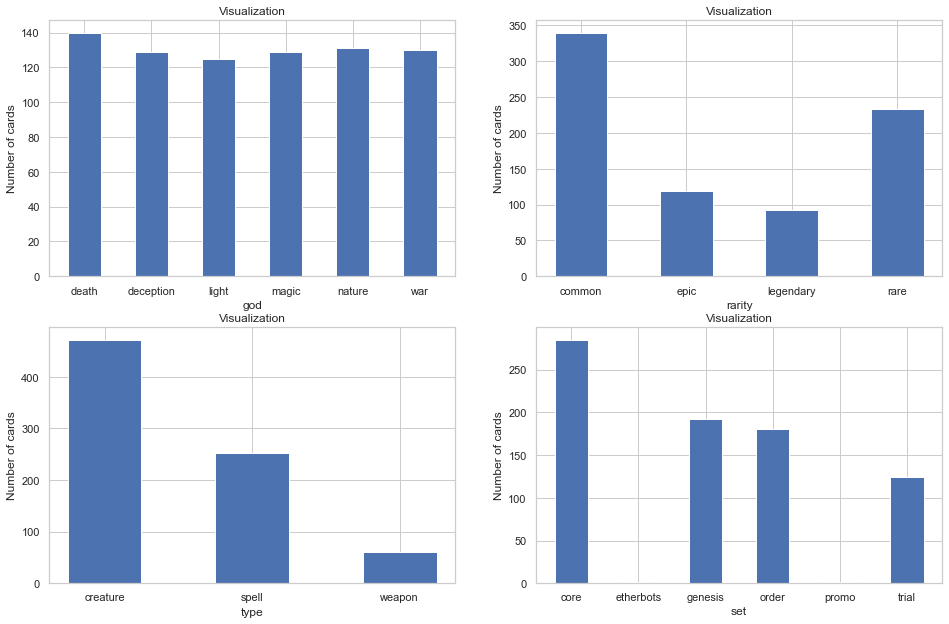

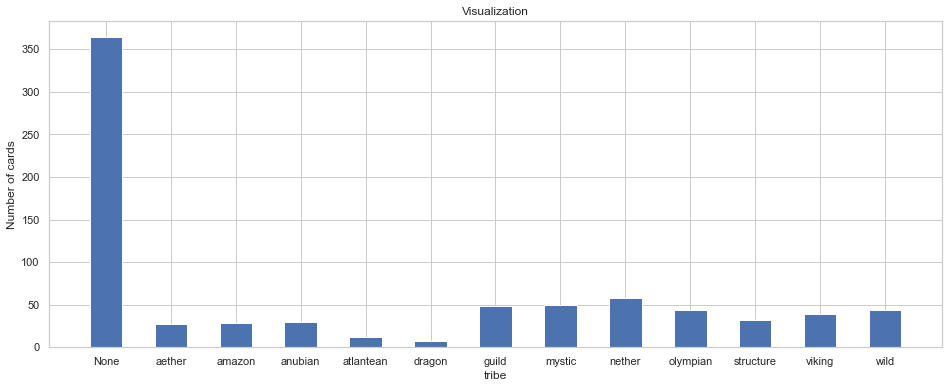

In [317]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
i = 1
for col in df_categorical.drop(['name','effect'],axis=1):
    if col == 'tribe':
        continue
    test = df_categorical.groupby(by=col).agg({'name':'count'})
    
    
    plt.subplot(3, 2, i)

    plt.bar(test.index, test.name, 0.5, label='God')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.ylabel('Number of cards')
    plt.xlabel(col)
    plt.title('Visualization')

    # Label with label_type 'center' instead of the default 'edge'
    i +=1


plt.figure(figsize=(16,6))
test = df_categorical.groupby(by='tribe').agg({'name':'count'})


plt.bar(test.index, test.name, 0.5, label='God')
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylabel('Number of cards')
plt.xlabel('tribe')
plt.title('Visualization')

plt.show()


#### 5.2.2 Binarizando algumas colunas categoricas

In [318]:
df_categorical.loc[:,'god':'set'].head()

,god,rarity,tribe,type,set
id,,,,,
107,magic,rare,None,spell,genesis
220,light,common,None,creature,genesis
221,light,common,None,spell,genesis
222,war,rare,None,weapon,genesis
1,death,rare,None,spell,genesis


In [319]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first')

x_bin = pd.DataFrame(onehot.fit_transform(df_categorical.loc[:,'god':'set']), index=df_categorical.index, columns=onehot.get_feature_names_out())
x_bin.head()

,god_deception,god_light,god_magic,god_nature,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
107,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
221,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [320]:
print(x_bin.shape)
print(df_categorical.shape)

(784, 27)
(784, 7)


In [321]:
df_categorical = pd.concat([df_categorical.loc[:,'name':'effect'], x_bin], axis=1)
df_categorical.head()

,name,effect,god_deception,god_light,god_magic,god_nature,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
107,Erratic Summons,Summon a copy of a random creature from your opponent's void.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
220,Field Nurse,"At the end of each turn, heal 2 to a random friendly injured creature.",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
221,Sit Down,"Set a creature's strength to 0.<br>At the start of your next turn, set it to its base value.",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
222,Bast's Claws,"Godblitz.<br>Whenever you attack, give +1/+1 to a random creature in your hand.",0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Nethergram,Summon three random creatures that cost 3 mana or less from your void. Give them +1/+1.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [322]:
df_categorical.shape

(784, 29)

### 5.3 Numerical (int) columns

In [323]:
df_int = df_all[df_all.dtypes[df_all.dtypes == 'int64'].index]
df_int.head()

,mana,attack,health
id,,,
107,2,0,0
220,1,1,2
221,1,0,0
222,6,3,4
1,7,0,0


#### 5.3.1 Numerical EAD

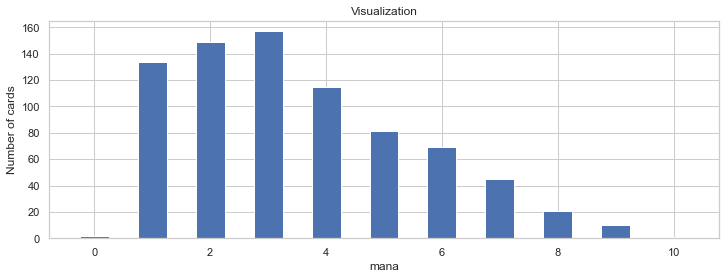

In [324]:
test = df_int.groupby('mana').agg({'attack':'count'})

plt.figure(figsize=(12,4))

plt.bar(test.index, test.attack, 0.5, label='Mana')
plt.ylabel('Number of cards')
plt.xlabel('mana')
plt.title('Visualization')

plt.show()

#### 5.3.2 Normalizando

In [325]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

norm_int = StandardScaler()
df_int_norm = pd.DataFrame(norm_int.fit_transform(df_int), index=list(df_int.index),columns=[list(df_int.columns)])
df_int_norm.head()

,mana,attack,health
107,-0.755787,-0.878513,-0.980555
220,-1.250805,-0.411244,-0.143587
221,-1.250805,-0.878513,-0.980555
222,1.224286,0.523293,0.693381
1,1.719304,-0.878513,-0.980555


### 5.4 Numerical (float) columns

In [326]:
df_float = df_all[df_all.dtypes[df_all.dtypes == 'float'].index]
df_float.head()

,price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
id,,,,,,
107,1.958705,1.775158,0.103398,0.003,0.550,0.550
220,1.792713,2.552127,0.423612,0.063,0.581,0.582
221,0.846559,0.823600,0.027877,0.008,0.527,0.527
222,1.925507,1.831800,0.051156,0.003,0.535,0.535
1,1.261539,1.278083,0.013114,0.003,0.573,0.573


### 5.4.1 Defining the target

#### Real target is here

In [327]:
y_ETH = np.log1p(df_float['price_ETH_$'])
y_GODS = np.log1p(df_float['price_GODS_$'])

assimetria ETH:  6.246575248516181
assimetria GODS:  6.9768073439507585
Sem assimetria:  1.640394829605537
Sem assimetria:  1.6747504296580253


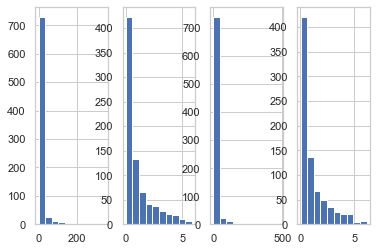

In [328]:
from scipy.stats import skew
from matplotlib.pyplot import figure

print("assimetria ETH: ", skew(df_float['price_ETH_$']))
print("assimetria GODS: ", skew(df_float['price_GODS_$']))

print("Sem assimetria: ",skew(np.log1p(df_float['price_ETH_$'])))
print("Sem assimetria: ",skew(np.log1p(df_float['price_GODS_$'])))

fig, ax = plt.subplots(nrows=1, ncols=4)

ax[0].hist(df_float['price_ETH_$'])
ax[1].hist(np.log1p(df_float['price_ETH_$']))
ax[2].hist(df_float['price_GODS_$'])
ax[3].hist(np.log1p(df_float['price_GODS_$']))


plt.show()

### 5.5 Juntando tudo

In [329]:
print(df_categorical.shape)
print(df_int_norm.shape)
print(df_float.shape)

(784, 29)
(784, 3)
(784, 6)


In [330]:
df_all_clean = pd.concat([df_categorical, df_int_norm, df_float], axis=1)

#df_more.rename({'Name': 'name'}, axis=1, inplace=True)
df_all_clean.head()


,name,effect,god_deception,god_light,god_magic,god_nature,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)",price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
107,Erratic Summons,Summon a copy of a random creature from your opponent's void.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.755787,-0.878513,-0.980555,1.958705,1.775158,0.103398,0.003,0.550,0.550
220,Field Nurse,"At the end of each turn, heal 2 to a random friendly injured creature.",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.250805,-0.411244,-0.143587,1.792713,2.552127,0.423612,0.063,0.581,0.582
221,Sit Down,"Set a creature's strength to 0.<br>At the start of your next turn, set it to its base value.",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.250805,-0.878513,-0.980555,0.846559,0.823600,0.027877,0.008,0.527,0.527
222,Bast's Claws,"Godblitz.<br>Whenever you attack, give +1/+1 to a random creature in your hand.",0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.224286,0.523293,0.693381,1.925507,1.831800,0.051156,0.003,0.535,0.535
1,Nethergram,Summon three random creatures that cost 3 mana or less from your void. Give them +1/+1.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.719304,-0.878513,-0.980555,1.261539,1.278083,0.013114,0.003,0.573,0.573


#### 5.5.1 Small EAD

C:\Users\Isaac\AppData\Local\Temp\ipykernel_21908\2585339577.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


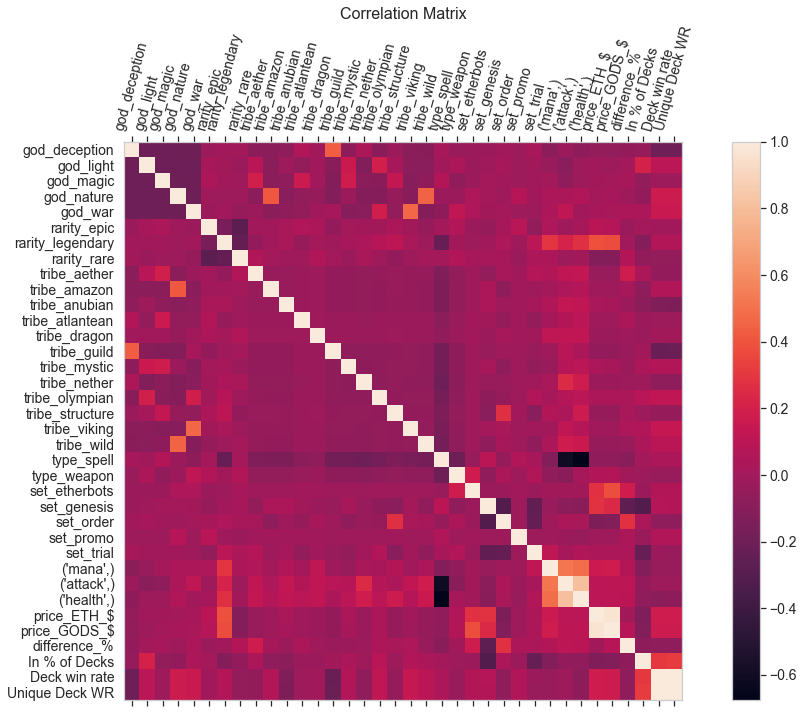

In [331]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(18, 10))


plt.matshow(df_all_clean.corr(), fignum=f.number)
plt.xticks(range(df_all_clean.select_dtypes(['number']).shape[1]), df_all_clean.select_dtypes(['number']).columns, fontsize=14, rotation=75)
plt.yticks(range(df_all_clean.select_dtypes(['number']).shape[1]), df_all_clean.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.grid(False)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

plt.show()

## 7. Manipulando a coluna de descrição

In [332]:
df_text = pd.DataFrame(df_all_clean['effect'])
df_text.head()

,effect
107,Summon a copy of a random creature from your opponent's void.
220,"At the end of each turn, heal 2 to a random friendly injured creature."
221,"Set a creature's strength to 0.<br>At the start of your next turn, set it to its base value."
222,"Godblitz.<br>Whenever you attack, give +1/+1 to a random creature in your hand."
1,Summon three random creatures that cost 3 mana or less from your void. Give them +1/+1.


### 7.1 Cleaning Text

In [333]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[ *]', ' ', text)
    return text

In [334]:
df_text['effect_clean'] = df_text['effect'].apply(clean_text)
df_text.head(5)

,effect,effect_clean
107,Summon a copy of a random creature from your opponent's void.,summon a copy of a random creature from your opponents void
220,"At the end of each turn, heal 2 to a random friendly injured creature.",at the end of each turn heal to a random friendly injured creature
221,"Set a creature's strength to 0.<br>At the start of your next turn, set it to its base value.",set a creatures strength to at the start of your next turn set it to its base value
222,"Godblitz.<br>Whenever you attack, give +1/+1 to a random creature in your hand.",godblitz whenever you attack give to a random creature in your hand
1,Summon three random creatures that cost 3 mana or less from your void. Give them +1/+1.,summon three random creatures that cost mana or less from your void give them


### 7.2 Removing StopWords

In [335]:
#import nltk
#nltk.download('stopwords')

In [336]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english') + ['u', 'im', 'c']
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df_text['effect_clean'] = df_text['effect_clean'].apply(remove_stopwords)
df_text.head()

,effect,effect_clean
107,Summon a copy of a random creature from your opponent's void.,summon copy random creature opponents void
220,"At the end of each turn, heal 2 to a random friendly injured creature.",end turn heal random friendly injured creature
221,"Set a creature's strength to 0.<br>At the start of your next turn, set it to its base value.",set creatures strength start next turn set base value
222,"Godblitz.<br>Whenever you attack, give +1/+1 to a random creature in your hand.",godblitz whenever attack give random creature hand
1,Summon three random creatures that cost 3 mana or less from your void. Give them +1/+1.,summon three random creatures cost mana less void give


### 7.3 Stemming

In [337]:
import nltk

stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [338]:
df_text['effect_clean'] = df_text['effect_clean'].apply(stemm_text)
df_text.head()

,effect,effect_clean
107,Summon a copy of a random creature from your opponent's void.,summon copi random creatur oppon void
220,"At the end of each turn, heal 2 to a random friendly injured creature.",end turn heal random friend injur creatur
221,"Set a creature's strength to 0.<br>At the start of your next turn, set it to its base value.",set creatur strength start next turn set base valu
222,"Godblitz.<br>Whenever you attack, give +1/+1 to a random creature in your hand.",godblitz whenev attack give random creatur hand
1,Summon three random creatures that cost 3 mana or less from your void. Give them +1/+1.,summon three random creatur cost mana less void give


### 7.4 Vectorization

#### 7.4.1 CountVectorizer

In [339]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer conta quantos tokens, de cada tipo, aparecem em cada mensagem e criam um vetor para cada mensagem.
vect = CountVectorizer()
df_text_clean = vect.fit_transform(df_text.effect_clean)

df_text_clean = pd.DataFrame(df_text_clean.toarray(), columns=vect.get_feature_names_out(), index=df_text.index)
display(df_text_clean.head())

#print(vect.get_feature_names_out())
#print(df_text_clean.toarray())
print(df_text_clean.shape)

,abil,acolyt,across,add,addit,aether,aetherbug,afterlif,agrodor,aid,alreadi,also,amazon,among,amount,anim,anoth,anubian,appli,armor,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,beam,bearstrid,beast,becom,belong,beserk,bind,black,bladefli,bless,blight,blitz,boar,board,bomb,boost,bottom,buff,burn,caller,cannot,cant,card,cast,chain,chang,charact,choos,chosen,closer,combin,complet,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,death,debuff,decept,deck,delv,demon,destroy,die,differ,discard,divin,dog,domain,dont,doubl,draft,draw,drawn,durabl,echo,effect,eight,either,enchant,end,enemi,enter,equal,equip,escape,everi,exclud,expend,experiment,explos,extra,favor,fill,final,first,five,flameblad,flank,follow,foolhardi,forese,form,four,frenzi,friend,frontlin,fruit,full,fulli,gain,gem,generous,get,give,given,go,god,godblitz,goe,guard,guild,hand,hasnt,head,heal,health,hidden,hide,highest,hold,hook,huscarl,hydra,hyena,impl,includ,increas,inflict,injur,instead,jaguar,keep,kidnapp,kill,larceni,last,least,leech,less,lethenon,light,lock,look,lose,lowest,lowestcost,magic,mana,mani,maximum,mind,minus,mirror,miss,move,mystic,natur,nether,netherbeast,netherspawn,new,next,nightleaf,nondecept,nonneutr,nonvik,nonzombi,number,obliter,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overkil,owl,owner,per,perman,pick,pillar,plant,play,player,point,power,prison,probe,propyrean,protect,protector,prowler,pull,put,raider,rais,random,randomis,rat,reach,recruit,reduc,refresh,regen,relic,remain,remov,repeat,return,reveal,roar,rogu,rune,seer,select,sentient,set,seven,shadow,shimmerscal,shuffl,side,sinc,six,sixmana,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,start,stat,static,steal,strength,strike,strongest,structur,summon,surviv,survivor,swap,switch,taint,take,taken,target,ten,three,thunder,top,total,transform,treant,tree,tribe,trigger,turn,twin,two,unchain,underbrush,uniti,unless,unlock,unus,upgrad,use,valknir,valu,vibrant,vike,void,walk,war,ward,warrior,weakest,weapon,whenev,wild,wisdom,wisp,without,worth,xx,your,zombi,zone
107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

(784, 323)


#### 7.4.2 TF-IDF

In [340]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_tf = TfidfVectorizer()
df_text_clean = vect_tf.fit_transform(df_text.effect_clean)

df_text_clean = pd.DataFrame(df_text_clean.toarray(), columns=vect_tf.get_feature_names_out(), index=df_text.index)
display(df_text_clean.head())

#print(vect_tf.get_feature_names_out())
#print(df_text_clean.toarray())
print(df_text_clean.shape)

,abil,acolyt,across,add,addit,aether,aetherbug,afterlif,agrodor,aid,alreadi,also,amazon,among,amount,anim,anoth,anubian,appli,armor,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,beam,bearstrid,beast,becom,belong,beserk,bind,black,bladefli,bless,blight,blitz,boar,board,bomb,boost,bottom,buff,burn,caller,cannot,cant,card,cast,chain,chang,charact,choos,chosen,closer,combin,complet,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,death,debuff,decept,deck,delv,demon,destroy,die,differ,discard,divin,dog,domain,dont,doubl,draft,draw,drawn,durabl,echo,effect,eight,either,enchant,end,enemi,enter,equal,equip,escape,everi,exclud,expend,experiment,explos,extra,favor,fill,final,first,five,flameblad,flank,follow,foolhardi,forese,form,four,frenzi,friend,frontlin,fruit,full,fulli,gain,gem,generous,get,give,given,go,god,godblitz,goe,guard,guild,hand,hasnt,head,heal,health,hidden,hide,highest,hold,hook,huscarl,hydra,hyena,impl,includ,increas,inflict,injur,instead,jaguar,keep,kidnapp,kill,larceni,last,least,leech,less,lethenon,light,lock,look,lose,lowest,lowestcost,magic,mana,mani,maximum,mind,minus,mirror,miss,move,mystic,natur,nether,netherbeast,netherspawn,new,next,nightleaf,nondecept,nonneutr,nonvik,nonzombi,number,obliter,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overkil,owl,owner,per,perman,pick,pillar,plant,play,player,point,power,prison,probe,propyrean,protect,protector,prowler,pull,put,raider,rais,random,randomis,rat,reach,recruit,reduc,refresh,regen,relic,remain,remov,repeat,return,reveal,roar,rogu,rune,seer,select,sentient,set,seven,shadow,shimmerscal,shuffl,side,sinc,six,sixmana,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,start,stat,static,steal,strength,strike,strongest,structur,summon,surviv,survivor,swap,switch,taint,take,taken,target,ten,three,thunder,top,total,transform,treant,tree,tribe,trigger,turn,twin,two,unchain,underbrush,uniti,unless,unlock,unus,upgrad,use,valknir,valu,vibrant,vike,void,walk,war,ward,warrior,weakest,weapon,whenev,wild,wisdom,wisp,without,worth,xx,your,zombi,zone
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544825,0.000000,0.0,0.183193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.417642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.381066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.471928,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.155723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

(784, 323)


### 7.5 Putting everything together

In [341]:
df_all_NLP = pd.concat([df_text_clean, df_all_clean.loc[:,'god_deception':'Unique Deck WR']],axis=1)
display(df_all_NLP.head())
print(df_all_NLP.shape)

,abil,acolyt,across,add,addit,aether,aetherbug,afterlif,agrodor,aid,alreadi,also,amazon,among,amount,anim,anoth,anubian,appli,armor,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,beam,bearstrid,beast,becom,belong,beserk,bind,black,bladefli,bless,blight,blitz,boar,board,bomb,boost,bottom,buff,burn,caller,cannot,cant,card,cast,chain,chang,charact,choos,chosen,closer,combin,complet,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,death,debuff,decept,deck,delv,demon,destroy,die,differ,discard,divin,dog,domain,dont,doubl,draft,draw,drawn,durabl,echo,effect,eight,either,enchant,end,enemi,enter,equal,equip,escape,everi,exclud,expend,experiment,explos,extra,favor,fill,final,first,five,flameblad,flank,follow,foolhardi,forese,form,four,frenzi,friend,frontlin,fruit,full,fulli,gain,gem,generous,get,give,given,go,god,godblitz,goe,guard,guild,hand,hasnt,head,heal,health,hidden,hide,highest,hold,hook,huscarl,hydra,hyena,impl,includ,increas,inflict,injur,instead,jaguar,keep,kidnapp,kill,larceni,last,least,leech,less,lethenon,light,lock,look,lose,lowest,lowestcost,magic,mana,mani,maximum,mind,minus,mirror,miss,move,mystic,natur,nether,netherbeast,netherspawn,new,next,nightleaf,nondecept,nonneutr,nonvik,nonzombi,number,obliter,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overkil,owl,owner,per,perman,pick,pillar,plant,play,player,point,power,prison,probe,propyrean,protect,protector,prowler,pull,put,raider,rais,random,randomis,rat,reach,recruit,reduc,refresh,regen,relic,remain,remov,repeat,return,reveal,roar,rogu,rune,seer,select,sentient,set,seven,shadow,shimmerscal,shuffl,side,sinc,six,sixmana,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,start,stat,static,steal,strength,strike,strongest,structur,summon,surviv,survivor,swap,switch,taint,take,taken,target,ten,three,thunder,top,total,transform,treant,tree,tribe,trigger,turn,twin,two,unchain,underbrush,uniti,unless,unlock,unus,upgrad,use,valknir,valu,vibrant,vike,void,walk,war,ward,warrior,weakest,weapon,whenev,wild,wisdom,wisp,without,worth,xx,your,zombi,zone,god_deception,god_light,god_magic,god_nature,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)",price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544825,0.000000,0.0,0.183193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.417642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.381066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.471928,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0

(784, 359)


#### 5.5.1 Small EAD

C:\Users\Isaac\AppData\Local\Temp\ipykernel_21908\3754770008.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


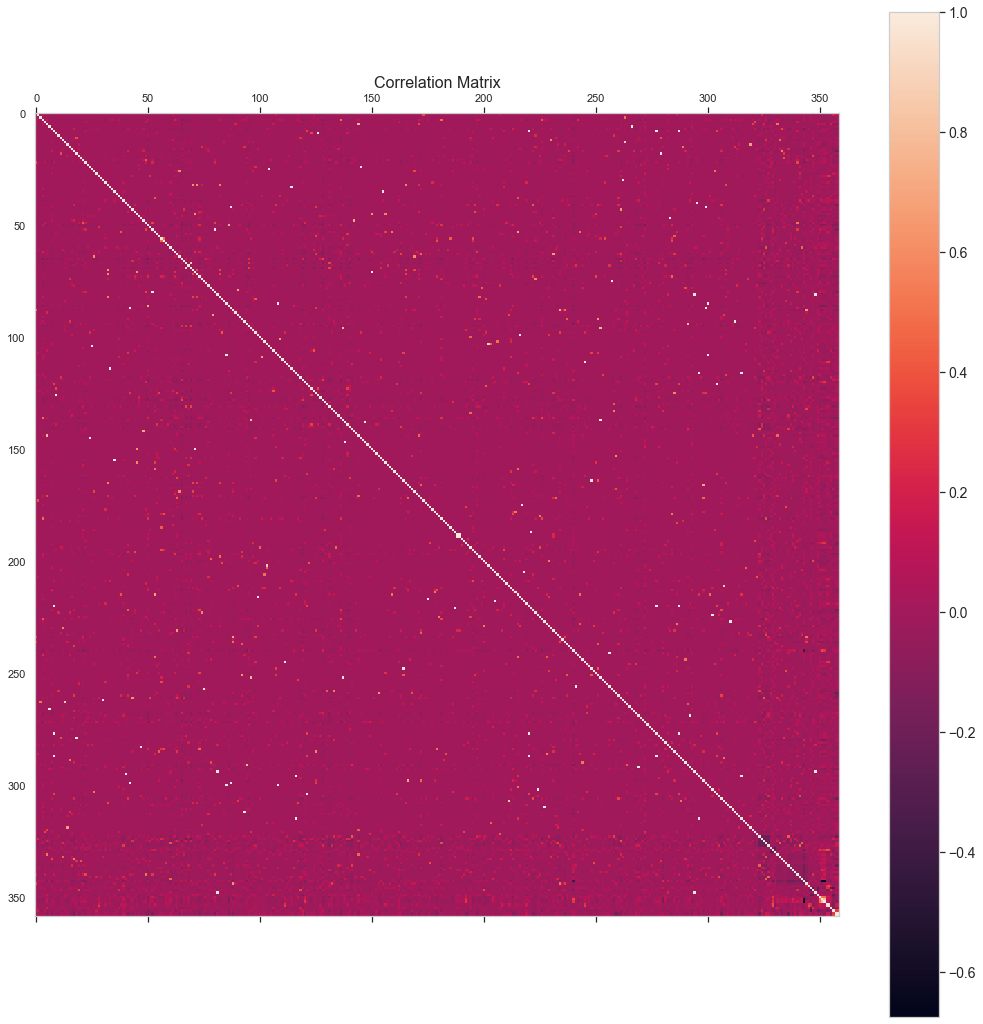

In [342]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(18, 18))


plt.matshow(df_all_NLP.corr(), fignum=f.number)
#plt.xticks(range(df_all_NLP.select_dtypes(['number']).shape[1]), df_all_clean.select_dtypes(['number']).columns, fontsize=14, rotation=90)
#plt.yticks(range(df_all_NLP.select_dtypes(['number']).shape[1]), df_all_clean.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.grid(False)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

plt.show()

In [343]:
# df_all_NLP.to_csv("gods_unchained_dataset_pre-processed.csv")

df_all_NLP = pd.read_csv("gods_unchained_dataset_pre-processed.csv", index_col='Unnamed: 0')

In [344]:
df_all_NLP.isnull().sum()

abil                  0
ach                   0
acolyt                0
across                0
add                   0
addit                 0
aether                0
aetherbug             0
afterlif              0
agrodor               0
aid                   0
alreadi               0
also                  0
amazon                0
among                 0
amount                0
amplur                0
anim                  0
anoth                 0
anubian               0
appli                 0
armor                 0
artific               0
atlantean             0
attack                0
backlin               0
badger                0
barb                  0
barrel                0
base                  0
battlethral           0
beam                  0
bearstrid             0
beast                 0
becom                 0
belong                0
beneath               0
beserk                0
bind                  0
black                 0
bladefli              0
bless           

## 8. Criando os modelos de predição (ETH)

#### 6.1 Train/Test split

In [345]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df_all_NLP, y_ETH, test_size=0.33, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(df_all_NLP, y_ETH, test_size=0.33)


ValueError: Found input variables with inconsistent numbers of samples: [954, 784]

In [346]:
print("X train shape - ", X_train.shape)
print("X test shape - ", X_test.shape)
print("y train shape - ", y_train.shape)
print("y test shape - ", y_test.shape)

X train shape -  (521, 359)
X test shape -  (258, 359)
y train shape -  (521,)
y test shape -  (258,)


#### 6.2 Preparing results

In [347]:
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import explained_variance_score # EVS
from sklearn.metrics import r2_score

In [348]:
results = {
    "Model":[],
    "Kind":[],
    "MAE":[],
    "MSE":[],
    "EVS":[],
    "R2":[]
}
results = pd.DataFrame(results)

In [349]:
def addModelToResults(model_name="None",model_kind="None", y_test=0, y_pred=0):
    '''Essa função adiciona o resultado do seu modelo ao "results" global,
    lembre-se de criar um results com as variaveis corretas:
        results = {
        "Model":[],
        "Kind":[],
        "MAE":[],
        "MSE":[],
        "EVS":[],
        "R2":[]
    }'''
    global results
    parameters = {
        'Model': [model_name],
        'Kind': [model_kind],
        'MAE': [mean_absolute_error(y_test, y_pred)],
        'MSE': [mean_squared_error(y_test, y_pred)],
        'EVS': [explained_variance_score(y_test, y_pred)],
        'R2': [r2_score(y_test, y_pred)]
    }
    parameters = pd.DataFrame(parameters)
    results = pd.concat([results, parameters], ignore_index=True)

#### 6.3 Modeling

In [350]:
# tree models
from sklearn.tree import DecisionTreeRegressor

# ensemble models
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

### 7.1 Cleaning Text

#### 6.3.2 Tree Models

In [351]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train.values, y_train)
y_pred = model_DTR.predict(X_test.values)
addModelToResults('Decision Tree Regressor',"Tree", y_test, y_pred)


#### 6.3.5 Ensemble Models

In [352]:
model_bagReg = BaggingRegressor() 
model_bagReg.fit(X_train.values, y_train.values.ravel())
y_pred = model_bagReg.predict(X_test.values)
addModelToResults('BaggingRegressor',"Ensemble", y_test, y_pred)

In [353]:
model_gradReg = GradientBoostingRegressor() 
model_gradReg.fit(X_train.values, y_train.values.ravel())
y_pred = model_gradReg.predict(X_test.values)
addModelToResults('GradientBoostingRegressor',"Ensemble", y_test, y_pred)

In [354]:
model_rfReg = RandomForestRegressor() 
model_rfReg.fit(X_train.values, y_train.values.ravel())
y_pred = model_rfReg.predict(X_test.values)
addModelToResults('Random Forest Regressor',"Ensemble", y_test, y_pred)

In [355]:
results

,Model,Kind,MAE,MSE,EVS,R2
0,Decision Tree Regressor,Tree,0.014930,0.001319,0.999174,0.999160
1,BaggingRegressor,Ensemble,0.012570,0.000758,0.999524,0.999517
2,GradientBoostingRegressor,Ensemble,0.009906,0.000324,0.999795,0.999794
3,Random Forest Regressor,Ensemble,0.009128,0.000519,0.999671,0.999670


### 6.4 Visualization

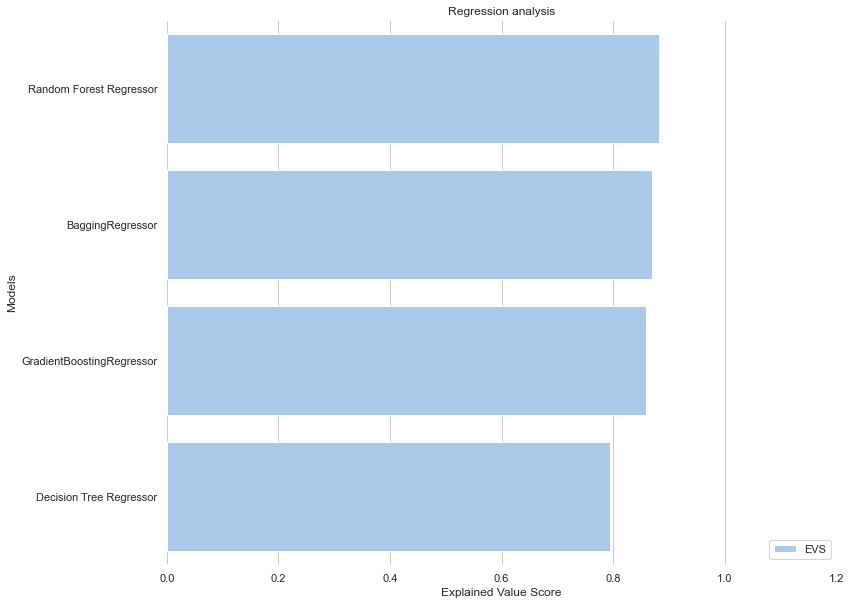

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
results_temp = results.sort_values("EVS", ascending=False)
sns.barplot(x="EVS", y="Model", data=results_temp,
            label="EVS", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1.2), ylabel="Models",
       xlabel="Explained Value Score",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

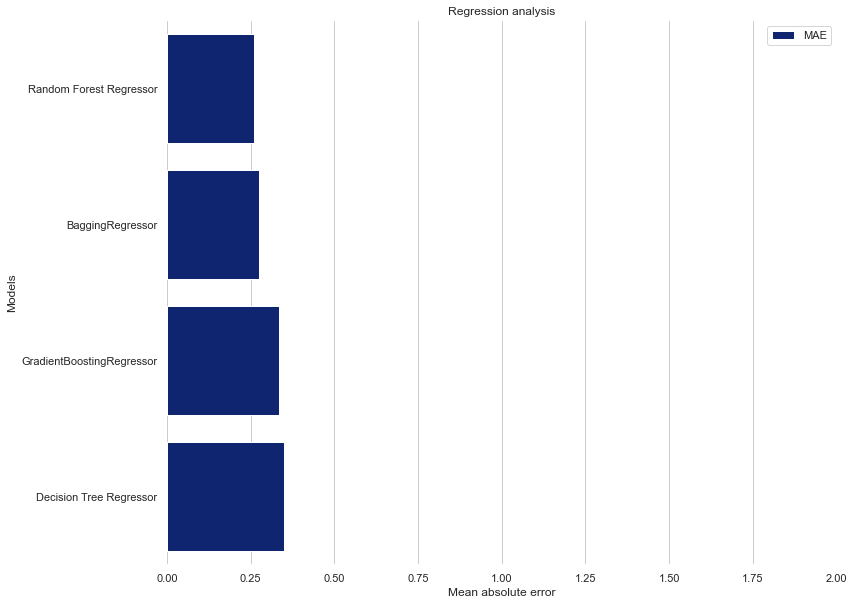

In [85]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes("dark")
results_temp = results.sort_values("MAE", ascending=True)
sns.barplot(x="MAE", y="Model", data=results_temp,
            label="MAE", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2), ylabel="Models",
       xlabel="Mean absolute error",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

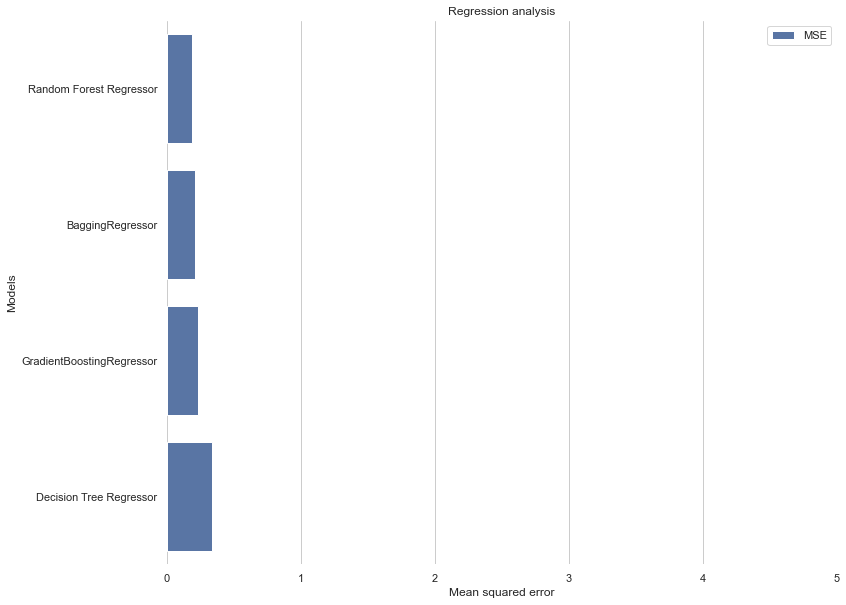

In [86]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes()
results_temp = results.sort_values("MSE", ascending=True)#.iloc[:8] # just the 8 first
sns.barplot(x="MSE", y="Model", data=results_temp,
            label="MSE", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 5), ylabel="Models",
       xlabel="Mean squared error",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

## 7. Criando os modelos de predição (GODS)

#### 6.1 Train/Test split

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_all_NLP, y_GODS, test_size=0.33, random_state=1)

In [88]:
print("X train shape - ", X_train.shape)
print("X test shape - ", X_test.shape)
print("y train shape - ", y_train.shape)
print("y test shape - ", y_test.shape)

X train shape -  (645, 407)
X test shape -  (319, 407)
y train shape -  (645,)
y test shape -  (319,)


#### 6.2 Preparing results

In [89]:
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import explained_variance_score # EVS
from sklearn.metrics import r2_score

In [90]:
results = {
    "Model":[],
    "Kind":[],
    "MAE":[],
    "MSE":[],
    "EVS":[],
    "R2":[]
}
results = pd.DataFrame(results)

In [91]:
y_true = y_test
X_df, X_train, X_test = X_train, X_train.values, X_test.values
def addModelToResults(model_name="None",model_kind="None"):
    '''Essa função adiciona o resultado do seu modelo ao "results" global,
    lembre-se de criar um results com as variaveis corretas:
        results = {
        "Model":[],
        "Kind":[],
        "MAE":[],
        "MSE":[],
        "EVS":[],
        "R2":[]
    }'''
    global results
    parameters = {
        'Model': [model_name],
        'Kind': [model_kind],
        'MAE': [mean_absolute_error(y_true, y_pred)],
        'MSE': [mean_squared_error(y_true, y_pred)],
        'EVS': [explained_variance_score(y_true, y_pred)],
        'R2': [r2_score(y_true, y_pred)]
    }
    parameters = pd.DataFrame(parameters)
    results = pd.concat([results, parameters], ignore_index=True)

#### 6.3 Modeling

In [92]:
# tree models
from sklearn.tree import DecisionTreeRegressor

# ensemble models
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

#### 6.3.2 Tree Models

In [93]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)
y_pred = model_DTR.predict(X_test)
addModelToResults('Decision Tree Regressor',"Tree")

#### 6.3.5 Ensemble Models

In [94]:
model_bagReg = BaggingRegressor() 
model_bagReg.fit(X_train, y_train.values.ravel())
y_pred = model_bagReg.predict(X_test)
addModelToResults('BaggingRegressor',"Ensemble")

In [95]:
model_gradReg = GradientBoostingRegressor() 
model_gradReg.fit(X_train, y_train.values.ravel())
y_pred = model_gradReg.predict(X_test)
addModelToResults('GradientBoostingRegressor',"Ensemble")

In [96]:
model_rfReg = RandomForestRegressor() 
model_rfReg.fit(X_train, y_train.values.ravel())
y_pred = model_rfReg.predict(X_test)
addModelToResults('Random Forest Regressor',"Ensemble")

In [97]:
results

,Model,Kind,MAE,MSE,EVS,R2
0,Decision Tree Regressor,Tree,0.338527,0.355757,0.792872,0.787951
1,BaggingRegressor,Ensemble,0.294400,0.231844,0.862359,0.861809
2,GradientBoostingRegressor,Ensemble,0.332696,0.233523,0.860920,0.860809
3,Random Forest Regressor,Ensemble,0.272441,0.201670,0.880255,0.879795


### 6.4 Visualization

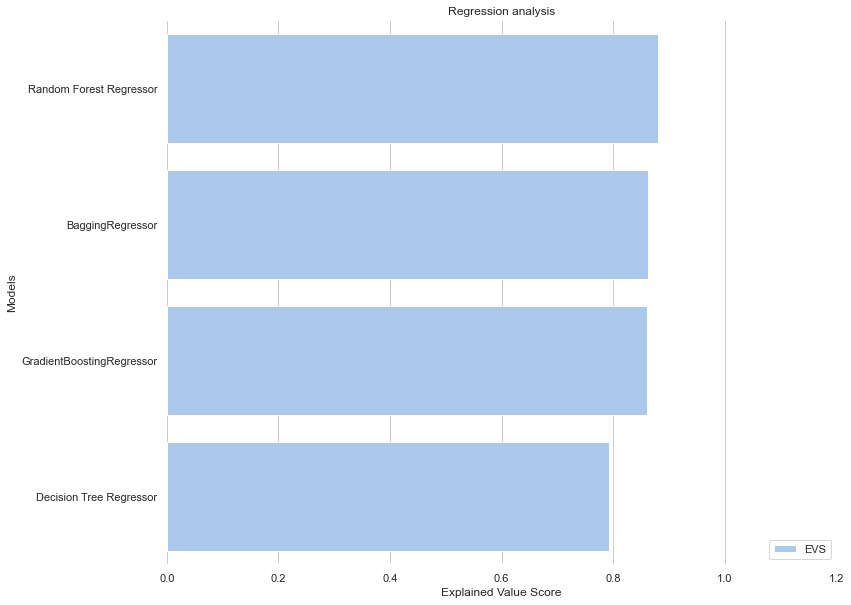

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
results_temp = results.sort_values("EVS", ascending=False)
sns.barplot(x="EVS", y="Model", data=results_temp,
            label="EVS", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1.2), ylabel="Models",
       xlabel="Explained Value Score",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

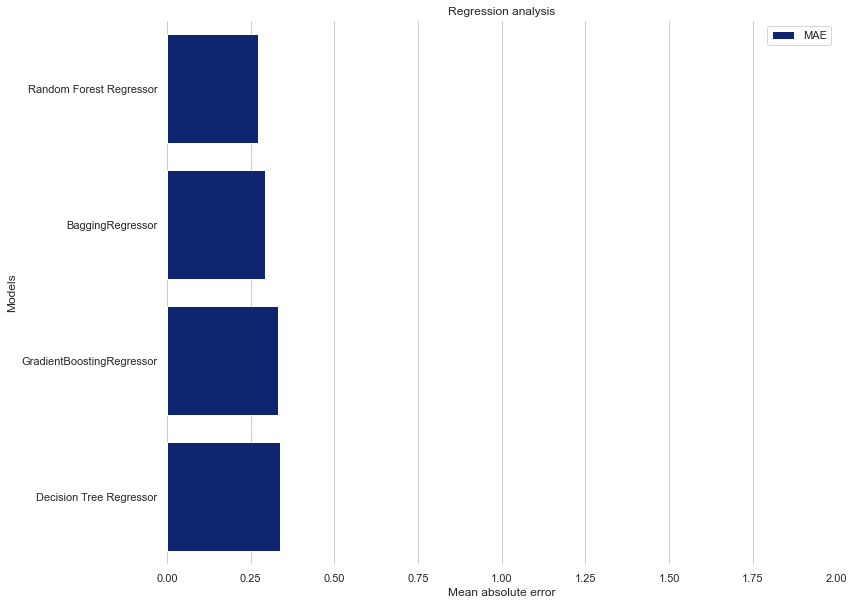

In [99]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes("dark")
results_temp = results.sort_values("MAE", ascending=True)
sns.barplot(x="MAE", y="Model", data=results_temp,
            label="MAE", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2), ylabel="Models",
       xlabel="Mean absolute error",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

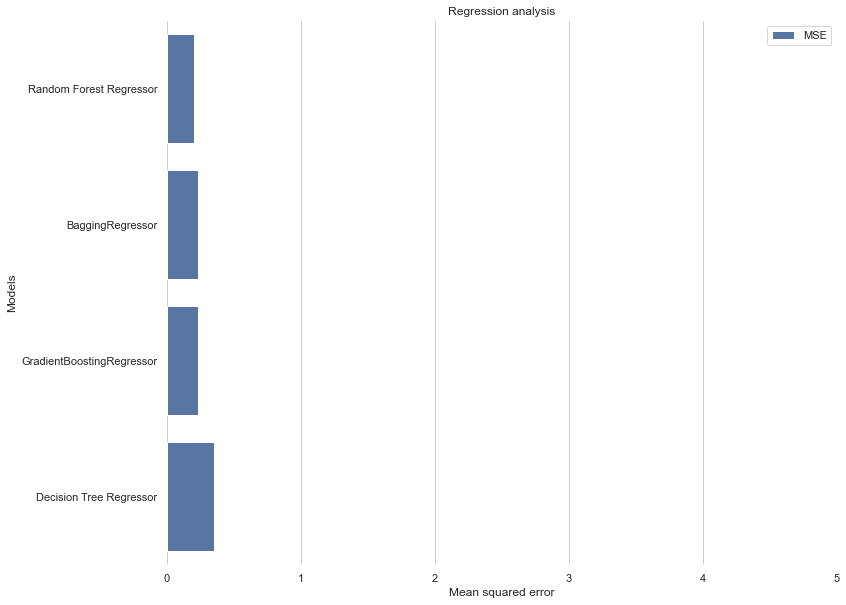

In [100]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes()
results_temp = results.sort_values("MSE", ascending=True)#.iloc[:8] # just the 8 first
sns.barplot(x="MSE", y="Model", data=results_temp,
            label="MSE", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 5), ylabel="Models",
       xlabel="Mean squared error",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()